In [1]:
import pandas as pd

# File name
file_name = 'spambase.data'

# Define the column names as specified in the UCI Machine Learning Repository
columns = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'class'
]

# Load the dataset
df = pd.read_csv(file_name, header=None, names=columns)

# Display the first few rows of the dataframe
df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Exploration
df.describe()




,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [3]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [4]:

df['class'].value_counts()

class
0    2788
1    1813
Name: count, dtype: int64

In [5]:
# Preprocessing

# Feature Scaling
scaler = StandardScaler()
X = df.drop('class', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Output the shape of the train and test set
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (3220, 57)
Test set shape: (1381, 57)


## Train Random Forest and XGBoost Models

In [6]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)


In [7]:
# Evaluate Random Forest Model
print("Random Forest Model Evaluation")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Evaluate XGBoost Model
print("\nXGBoost Model Evaluation")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))


Random Forest Model Evaluation
Accuracy: 0.9565532223026793
Confusion Matrix:
 [[786  18]
 [ 42 535]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       804
           1       0.97      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381


XGBoost Model Evaluation
Accuracy: 0.9587255611875453
Confusion Matrix:
 [[782  22]
 [ 35 542]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       804
           1       0.96      0.94      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.96      0.96      1381
weighted avg       0.96      0.96      0.96      1381



# Hyperparameter Tuning

## Random Forest Hyperparameter Tuning:

In [8]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Random Forest Time and Memory calculation

In [9]:
import time
from memory_profiler import memory_usage

# Measure training time and memory usage for Random Forest
start_time_rf = time.time()
mem_usage_rf = memory_usage((grid_search_rf.fit, (X_train, y_train)))
end_time_rf = time.time()

training_time_rf = end_time_rf - start_time_rf
max_memory_usage_rf = max(mem_usage_rf)

print("Random Forest Training Time:", training_time_rf, "seconds")
print("Random Forest Max Memory Usage:", max_memory_usage_rf, "MiB")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Random Forest Training Time: 8.860377311706543 seconds
Random Forest Max Memory Usage: 192.78515625 MiB


## XGBoost Hyperparameter Tuning:

In [10]:
# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.6, 0.8, 1.0]
}

# Grid search
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), 
                               param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


## XGBoost Time and Memory calculation

In [11]:
# Measure training time and memory usage for XGBoost
start_time_xgb = time.time()
mem_usage_xgb = memory_usage((grid_search_xgb.fit, (X_train, y_train)))
end_time_xgb = time.time()

training_time_xgb = end_time_xgb - start_time_xgb
max_memory_usage_xgb = max(mem_usage_xgb)

print("XGBoost Training Time:", training_time_xgb, "seconds")
print("XGBoost Max Memory Usage:", max_memory_usage_xgb, "MiB")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
XGBoost Training Time: 5.41601300239563 seconds
XGBoost Max Memory Usage: 203.3046875 MiB


# Feature Importance Analysis

## Random Forest Feature Importance:

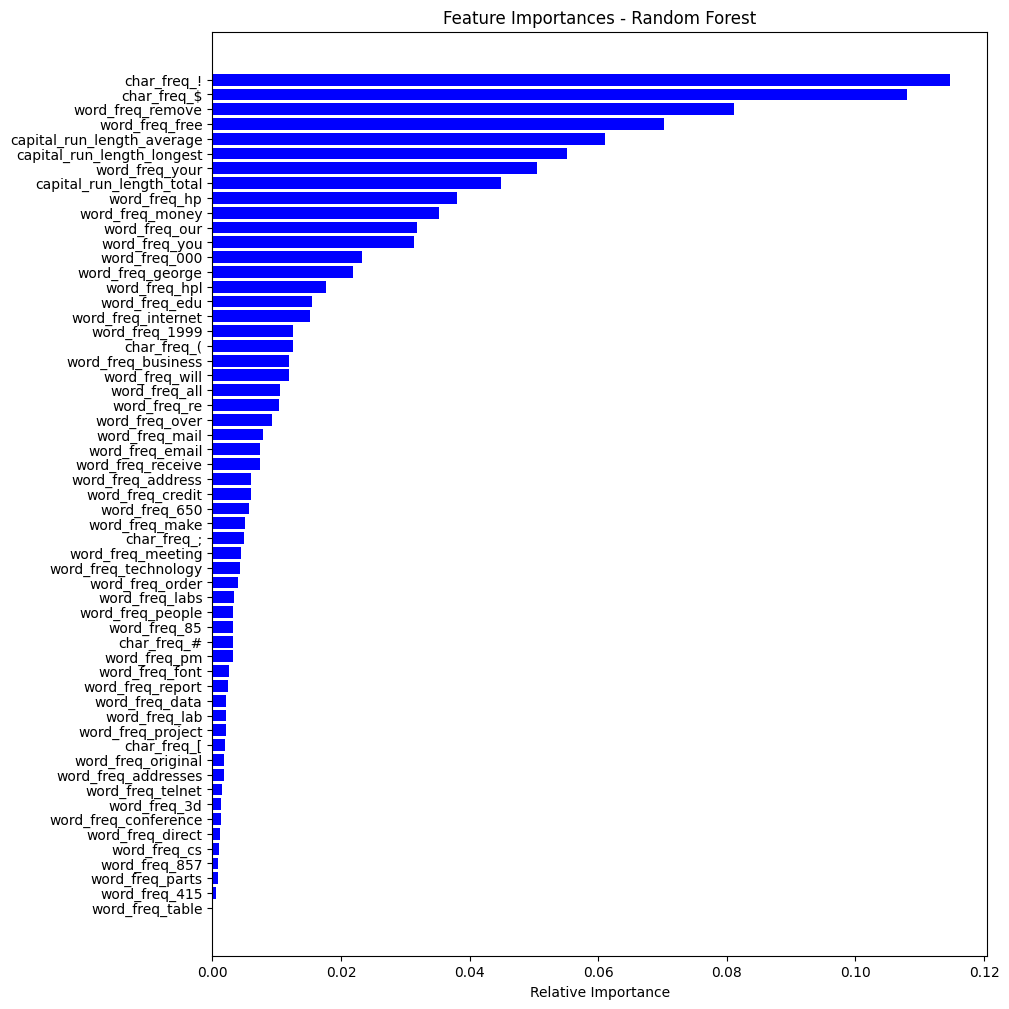

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Train the model with best parameters
rf_best = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

# Plot feature importances
importances = rf_best.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 12))
plt.title('Feature Importances - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## XGBoost Hyperparameter Tuning:

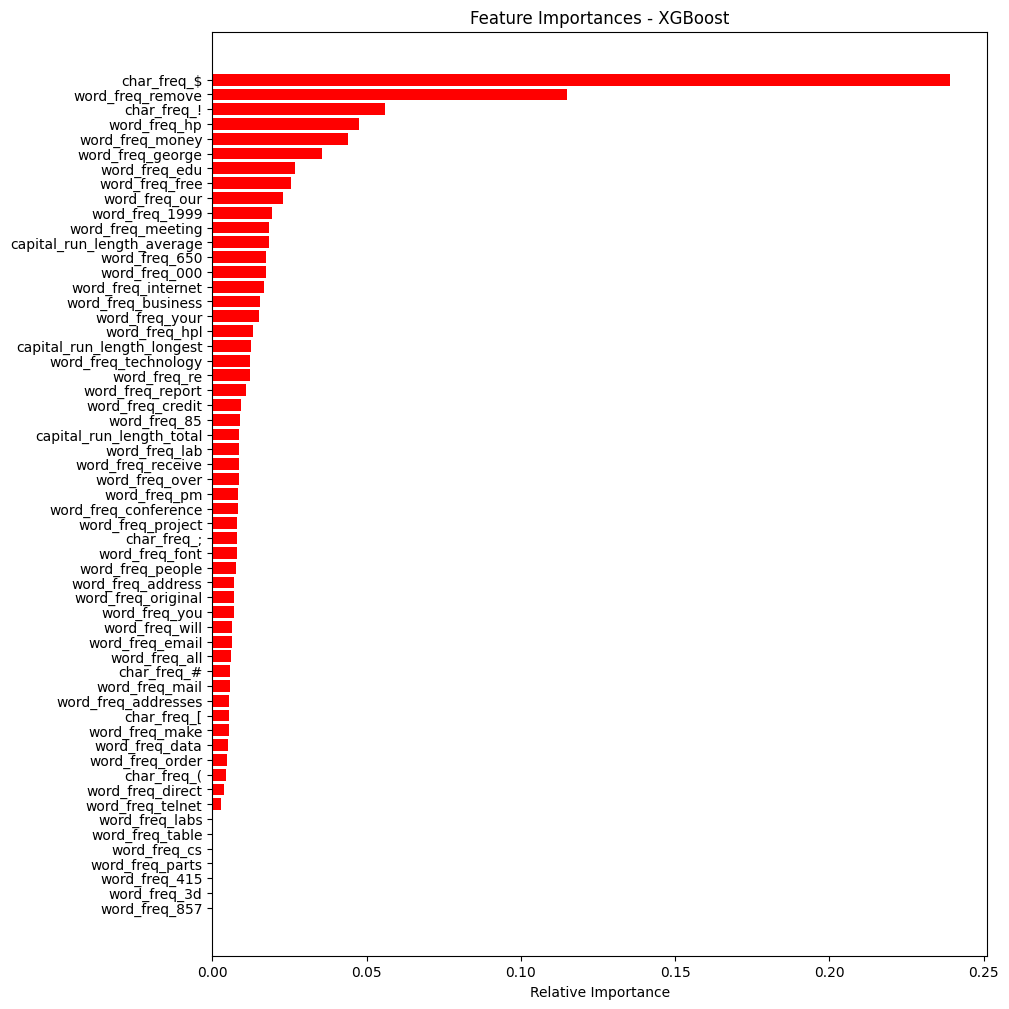

In [20]:
# Train the model with best parameters
xgb_best = XGBClassifier(**grid_search_xgb.best_params_, random_state=42)
xgb_best.fit(X_train, y_train)

# Plot feature importances
xgb_importances = xgb_best.feature_importances_
indices = np.argsort(xgb_importances)
plt.figure(figsize=(10, 12))
plt.title('Feature Importances - XGBoost')
plt.barh(range(len(indices)), xgb_importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# Cross-Validation

### Perform cross-validation to validate the model's performance.

In [22]:
# Rename features to remove problematic characters
df.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in df.columns]

# Then split the data again
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Refit the XGBoost model
xgb_best.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [23]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_best, X, y, cv=5)
print("Random Forest - Cross-Validation Accuracy Scores:", cv_scores_rf)

# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb_best, X, y, cv=5)
print("XGBoost - Cross-Validation Accuracy Scores:", cv_scores_xgb)


Random Forest - Cross-Validation Accuracy Scores: [0.94788274 0.94347826 0.9576087  0.97173913 0.825     ]
XGBoost - Cross-Validation Accuracy Scores: [0.95439739 0.95       0.95326087 0.96847826 0.84456522]


# Confusion Matrices


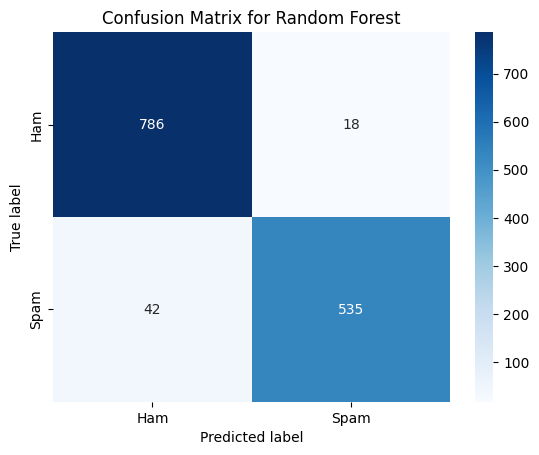

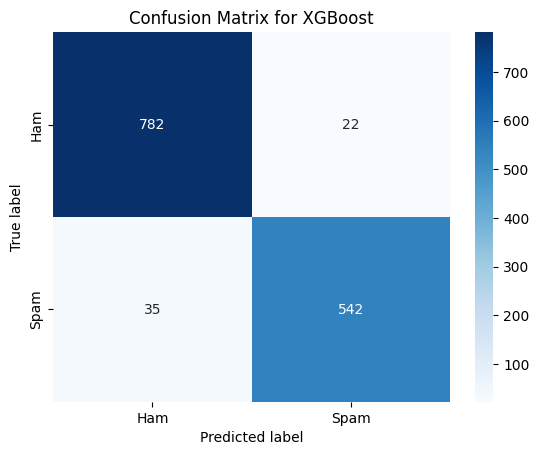

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(cm, classes, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(ticks=[0.5, 1.5], labels=classes)
    plt.yticks(ticks=[0.5, 1.5], labels=classes)
    plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(rf_cm, ["Ham", "Spam"], 'Confusion Matrix for Random Forest')

# XGBoost Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_predictions)
plot_confusion_matrix(xgb_cm, ["Ham", "Spam"], 'Confusion Matrix for XGBoost')


# ROC Curves

c:\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


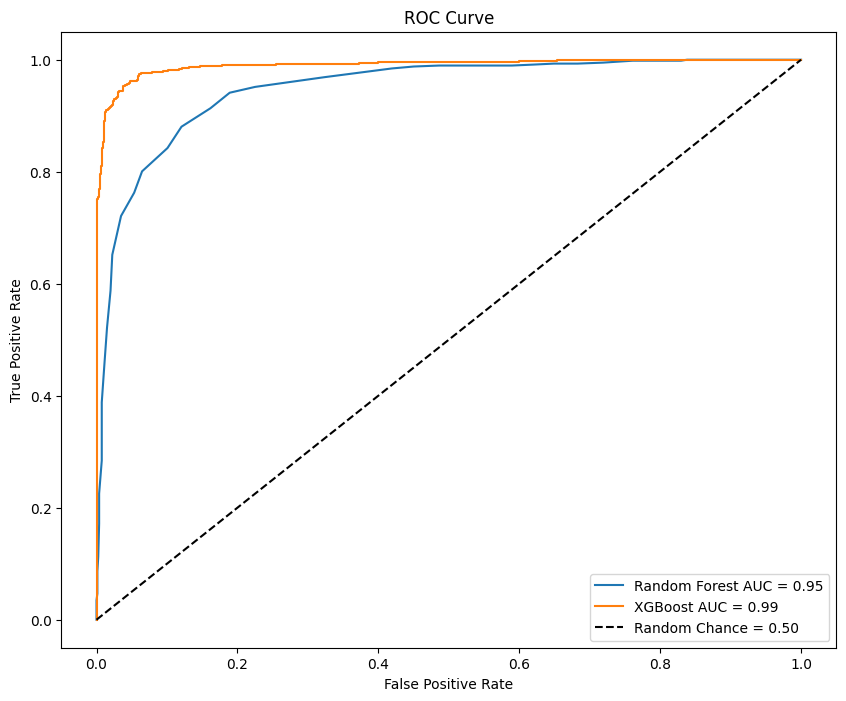

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve points
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_best.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_best.predict_proba(X_test)[:,1])

# Calculate the AUC (Area under the ROC Curve)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {auc_rf:.2f}')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC = {auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance = 0.50')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
